# Visualization and Exploration

**Authors:**
- Tyrone Lee, Department of Biomedical Informatics, Harvard Medical School (tyrone_lee@hms.harvard.edu)
- Tram Nguyen, Department of Biomedical Informatics, Harvard Medical School (Tram_Nguyen@hms.harvard.edu)
- Pascal Notin, Department of Systems Biology, Harvard Medical School
- Aaron W Kollasch, Department of Systems Biology, Harvard Medical School
- Yilan Wang, Department of Systems Biology, Harvard Medical School 
- Debora Marks, Department of Systems Biology, Harvard Medical School
- Ludwig Geistlinger, Department of Biomedical Informatics, Harvard Medical School

**Package:** ProteinGymPy

**Date:** November 14, 2025

## Setup

First, let's import the necessary libraries.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import proteingympy as pg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# Configure matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## Introduction

This vignette demonstrates how to explore and visualize experimental deep mutational scanning (DMS) fitness scores and variant effect prediction model scores from the ProteinGym database (Notin et al., 2023). Specifically, it walks through the functionality to generate heatmaps of DMS scores for all possible amino acid substitutions and projects these scores onto 3D protein structures. `ProteinGymPy` uses matplotlib and seaborn for 2D visualizations and nglview (when available) for 3D protein structure visualization. Finally, this vignette demonstrates how to contrast variant effects predictions with experimental measurements.

## Visualize DMS scores along a protein sequence

Here, we explore the "ACE2_HUMAN_Chan_2020" DMS assay from Chan et al. (2020) and create a heatmap of the DMS scores with `plot_dms_heatmap()`. If the argument `dms_data` is not specified, the default will load the most recent DMS substitution data from ProteinGym with `get_dms_substitution_data()`. This function only requires a specific assay name. To obtain all assay names, run: `list(pg.get_dms_substitution_data().keys())`. By default, the function also plots the full range of positions where DMS data is available for this assay. To plot a specific region of interest, use the arguments `start_pos` and `end_pos` which takes an integer for the first and last residue position to plot in the protein.

'dms_data' not provided, using DMS data loaded with get_dms_substitution_data()
Using cached file at .cache/DMS_ProteinGym_substitutions.zip.


Querying UniProt API for 185 entries...


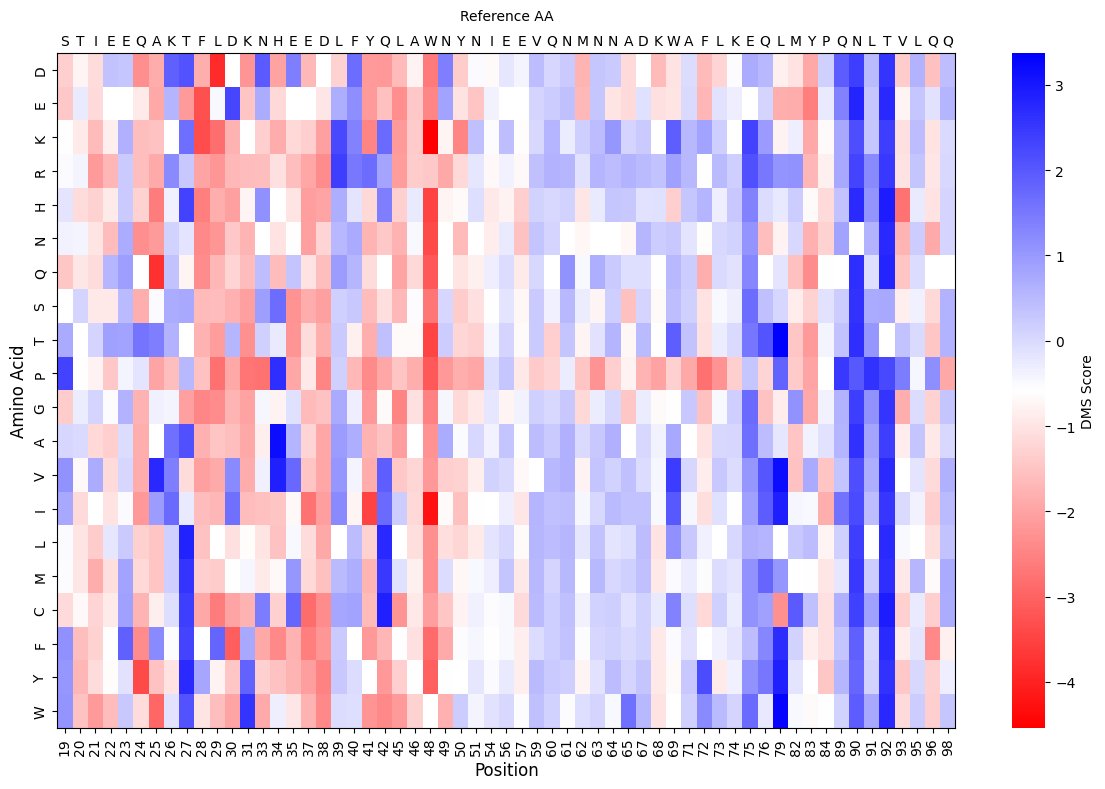

In [2]:
# Load DMS data
from proteingympy.plot_dms_heatmap import plot_dms_heatmap

# Create heatmap for ACE2_HUMAN_Chan_2020 assay (positions 1-100)
ace2_dms = plot_dms_heatmap(
    assay_name="ACE2_HUMAN_Chan_2020",
    start_pos=1,
    end_pos=100
)

plt.tight_layout()
plt.show()

The heatmap shows the DMS score at each position along the given protein sequence (x-axis) where a residue was mutated (y-axis: substituted amino acid, top; reference amino acid at the bottom). For demonstration, we subset to the first 1-100 positions and grouped the amino acids by their physiochemical properties (DE, KRH, NQ, ST, PGAVIL, MC, FYW). See [this reference](https://biology.stackexchange.com/questions/105321/arrangement-of-amino-acids-in-the-protein-alphabet) for more information. Note that not all positions along the protein sequence may be subjected to mutation for every DMS assay. This results from the specific research objectives, prioritization choices of the investigators, or technical constraints inherent to the experimental design.

A low DMS score indicates low fitness, while a higher DMS score indicates high fitness. We can think of higher DMS scores as being more benign, while lower DMS score indicates more pathogenic regions.

Based on the "ACE2_HUMAN_Chan_2020" assay, virtually all possible amino acid changes at positions 90 and 92 lead to higher fitness; possibly suggestive of a benign region of the protein. However, several mutations at position 48 resulted in low fitness. This could represent an important region for protein function where any perturbation would likely be deleterious.

Let's plot another assay, specifying a region and enabling row clustering. For more details about clustering options or to view more function parameters, refer to the documentation of the `plot_dms_heatmap` function.

'dms_data' not provided, using DMS data loaded with get_dms_substitution_data()
Using cached file at .cache/DMS_ProteinGym_substitutions.zip.
Querying UniProt API for 185 entries...
Querying UniProt API for 185 entries...


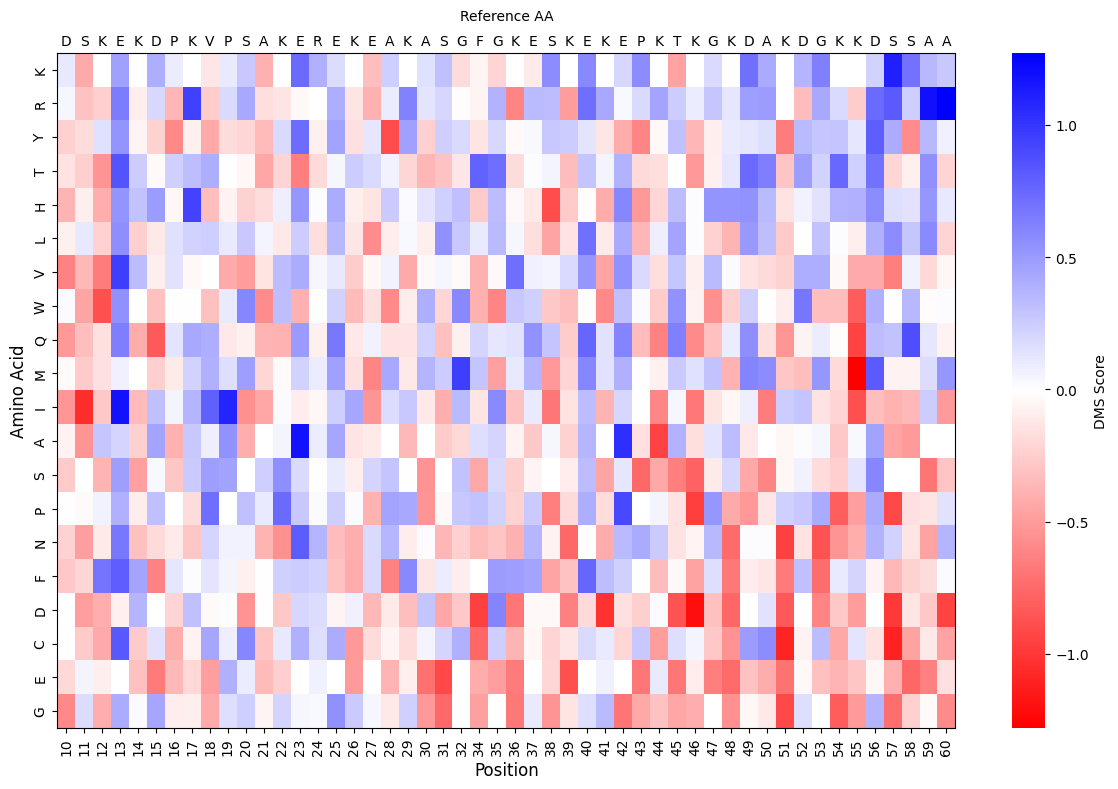

In [3]:
# Create heatmap for SHOC2_HUMAN_Kwon_2022 assay with clustering
shoc2_dms = plot_dms_heatmap(
    assay_name="SHOC2_HUMAN_Kwon_2022",
    start_pos=10,
    end_pos=60,
    cluster_rows=True
)

plt.tight_layout()
plt.show()

For example, in this region of the SHOC2_HUMAN protein, mutating to a Lysine (K, y-axis) resulted more frequently in higher fitness.

## Visualize model scores along a protein

ProteinGymPy provides functionality to generate heatmaps of zero-shot model scores for 79 variant effect prediction models and supervised models. The required arguments for this function are the assay name to plot (same as for the DMS heatmap), and a model to plot. For a complete list of models, run `pg.available_zero_shot_models()` for zero-shot models, and `pg.available_supervised_models()` for supervised models. If `model_data` is not provided, the default model scores from ProteinGym will be loaded from `get_zero_shot_substitution_data()`.

In [4]:
# First, let's see what models are available
zero_shot_models = pg.available_zero_shot_models()
print(f"Number of zero-shot models available: {len(zero_shot_models)}")
print(f"First 10 models: {zero_shot_models[:10]}")

Number of zero-shot models available: 79
First 10 models: ['Site_Independent', 'EVmutation', 'DeepSequence_single', 'DeepSequence_ensemble', 'EVE_single', 'EVE_ensemble', 'Unirep', 'Unirep_evotune', 'MSA_Transformer_single', 'MSA_Transformer_ensemble']


'model_data' not provided, attempting to load zero-shot model data...
Zero-shot scores found in cache at .cache/zero_shot_substitutions_scores.zip
Querying UniProt API for 185 entries...
Querying UniProt API for 185 entries...


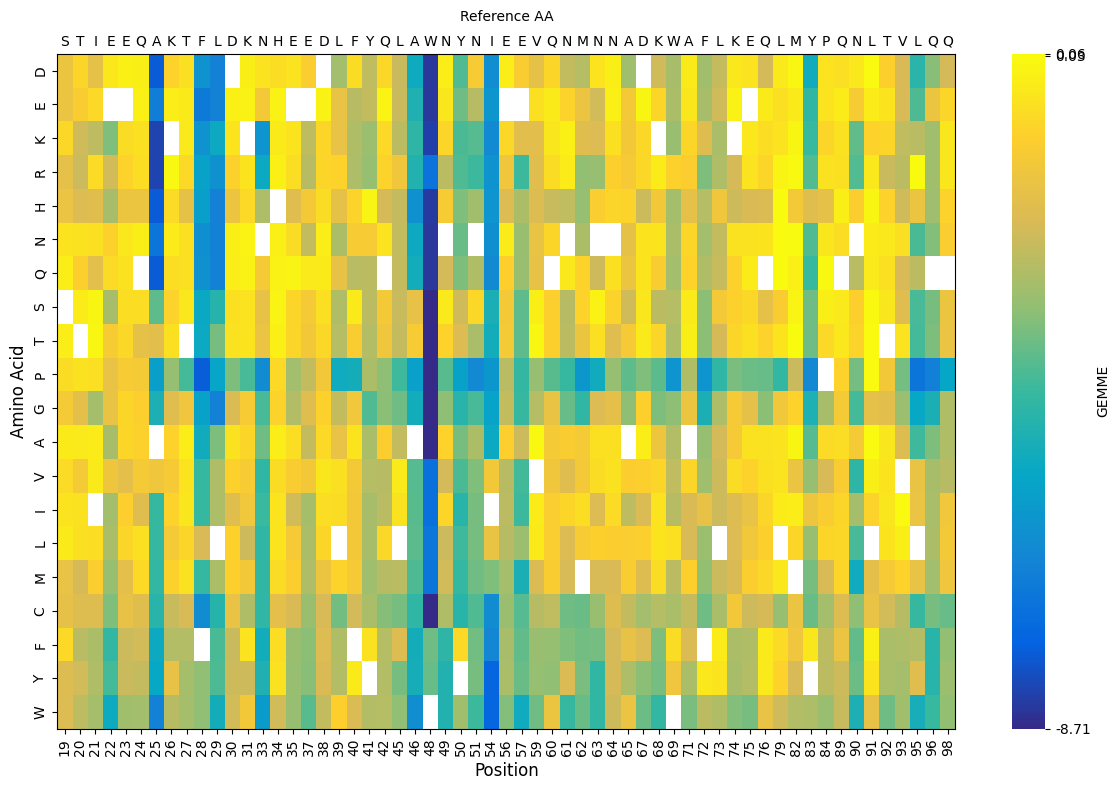

In [5]:
# Create heatmap for GEMME model scores
from proteingympy.plot_zeroshot_heatmap import plot_zeroshot_heatmap

# Plot GEMME heatmap on the second subplot
ace2_gemme = plot_zeroshot_heatmap(
    assay_name="ACE2_HUMAN_Chan_2020",
    model="GEMME",
    start_pos=1,
    end_pos=100,
)

As for DMS scores, we are plotting the GEMME zero-shot scores for positions 1 to 100 in the assay "ACE2_HUMAN_Chan_2020". At first glance, both the DMS data and GEMME model reveal position 48 to be quite pathogenic across amino acid substitutions. Note that the model scores here are mostly negative; however because these are model prediction scores, negative values do not necessarily indicate lower fitness after mutation as with DMS scores. Thus, model scores are always represented with another color palette to distinguish from experimental scores. Note further that model scores are not rescaled or normalized across the 79 models, and comparison of the predicted scores between models is thus not straightforward. See Notin et al. (2023) for more information on model scores and how to interpret them.

It can be useful to visualize the DMS and model scores side by side for a given assay to compare the experimental DMS scores and predicted zero-shot scores outputted from the model. You can create both plots and display them together using matplotlib subplots.

## 3D protein structure

This section demonstrates how to explore and visualize DMS or model scores on a 3D protein structure using nglview. The function requires DMS or model assay to aggregate scores that will be projected onto the 3D structure.

By default, if no `data_scores` argument is provided, the DMS substitutions from `get_dms_substitution_data()` are loaded in, or if viewing model scores, set this argument to any model available in ProteinGym v1.2. Get a list of zero-shot and supervised models with `available_zero_shot_models()` and `available_supervised_models()`.

If a model is chosen, a helper function is invoked which normalizes the model prediction scores using a rank-based normal quantile transformation. The result is a set of normalized scores that preserve the rank order of the models scores, while standardizing the distribution. Transformed values typically fall between -3 and 3. This normalization ensures the scores are approximately standard normally distributed (mean = 0, SD = 1), allowing comparisons across models.

The user may also specify what aggregation method to use for calculating the summary statistic at each residue position. By default, the mean DMS score/model prediction score is calculated for each position. See the function documentation for details: `help(pg.plot_structure)`

First, let's use all the default settings. The only required arguments are the `assay_name`.

Importantly, because the plot shows one protein structure, all DMS fitness scores across amino acids are aggregated within a position. By default this aggregation function is just the average of all the DMS scores at that position. However, it is possible to set any user-defined aggregation function with the `aggregate_fun` argument.

For DMS assays, a score of zero will always be represented as white, corresponding to the biological interpretation of neutral fitness effect.

**Note:** The following cells require addtional dependencies. Install with: `pip install proteingympy[visualization]` or `uv sync --extra visualization`

**Note:** Some of these cells have addtional scripting to build static demos of the 3D viewer. These are not part of the package and are soley for the purpose of making the documentation. `plot_structure` function by itself should return the interactive 3D model when run in an jupyter notebook.

'dms_data' not provided, loading with get_dms_substitution_data()
Using cached file at .cache/DMS_ProteinGym_substitutions.zip.
Querying UniProt API for 185 entries...
Querying UniProt API for 185 entries...
Using cached file at .cache/ProteinGym_AF2_structures.zip.
3D structure exported to: ace2_structure.html
Using cached file at .cache/ProteinGym_AF2_structures.zip.
3D structure exported to: ace2_structure.html


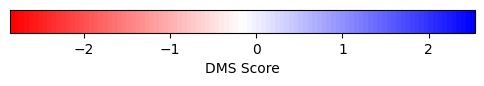

In [ ]:
from proteingympy.plot_structure import plot_structure
from IPython.display import display, IFrame

# `export_html` is an optional argument that will save the interactive structure to an HTML file
view, fig = plot_structure(
    assay_name="ACE2_HUMAN_Chan_2020",
    export_html="ace2_structure.html"
)

####SCRIPTING FOR READ THE DOCS####
# Display just the color bar
display(fig)

In [ ]:
####SCRIPTING FOR READ THE DOCS####
# Display the interactive structure from the saved HTML file in iframe
display(IFrame(src='../assets/ace2_structure.html', width='100%', height='350ppx'))

In this example, we are plotting the 3D structure of the ACE2_HUMAN protein and overlaying the mean DMS score across all mutants in a given position. Chan et al. (2020) who generated the DMS assay data only experimentally assessed a subset of the entire ACE2_HUMAN protein. By default, the function only colors the regions where there is information available in the assay. Red colors represent more pathogenic (lower DMS scores) and blue colors show more benign positions (higher DMS scores). Regions that appear white indicate closer to no change before and after the DMS perturbation. Grey regions represent the range of the protein assessed in the assay; however, only the colored regions include DMS data. Finally, by default, regions of the protein itself outside the range of the experimental assay have the "ball and stick" representation.

Some assays extensively assessed nearly every position of the complete protein, for example: the C6KNH7_9INFA protein from Lee et al. (2018). Let's visualize this protein and set the aggregation method to view the minimum DMS score across all mutants at each position by setting `aggregate_fun='min'`. To view a specific region in detail: use `start_pos` and `end_pos`.

'dms_data' not provided, loading with get_dms_substitution_data()
Using cached file at .cache/DMS_ProteinGym_substitutions.zip.
Querying UniProt API for 185 entries...
Querying UniProt API for 185 entries...
Using cached file at .cache/ProteinGym_AF2_structures.zip.
3D structure exported to: C6KNH7_structure.html
Using cached file at .cache/ProteinGym_AF2_structures.zip.
3D structure exported to: C6KNH7_structure.html


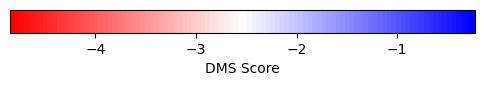

In [ ]:
# Plot with minimum aggregation function
import numpy as np

min_view,min_fig = plot_structure(
    assay_name="C6KNH7_9INFA_Lee_2018",
    aggregate_fun=np.min,
    export_html="C6KNH7_structure.html"  # This exports to HTML
)
####SCRIPTING FOR READ THE DOCS####
# Display just the color bar
display(min_fig)

In [ ]:
####SCRIPTING FOR READ THE DOCS####
# Display interactive structure with direct HTML display 
from IPython.display import HTML
HTML("C6KNH7_structure.html")

As we might expect, the minimum DMS value (more pathogenic) is almost always a negative number across all positions of this protein. Therefore, there seems to be at least one amino acid mutation that could severely disrupt the fitness at any position of this protein.

Finally, it is possible to use the same color scheme as the [popEVE mutation portal](https://pop.evemodel.org/). We can do this for any of the heatmaps or protein structure plots. This can be done by setting the argument `color_scheme` to "EVE".

## Correlate DMS scores with model scores

The `model_corr_plot()` function allows the user to evaluate the correlation between experimental and model prediction scores. By default, it takes in a protein UniProt ID and runs a Spearman correlation between the ProteinGym DMS assay scores and AlphaMissense predicted pathogenicity scores. However, as with `plot_structure()`, other models benchmarked in ProteinGym can also be specified via the `model` argument.

Loading data for AlphaMissense...
Loading AlphaMissense ProteinGym data...
Loaded 1,622,429 AlphaMissense scores for ProteinGym variants
Data covers 87 DMS assays
Columns: ['DMS_id', 'Uniprot_ID', 'variant_id', 'AlphaMissense', 'SwissProt_ID']
Loaded 1,622,429 AlphaMissense scores for ProteinGym variants
Data covers 87 DMS assays
Columns: ['DMS_id', 'Uniprot_ID', 'variant_id', 'AlphaMissense', 'SwissProt_ID']
Loading data for GEMME...
Zero-shot scores found in cache at .cache/zero_shot_substitutions_scores.zip
Loading data for GEMME...
Zero-shot scores found in cache at .cache/zero_shot_substitutions_scores.zip
Querying UniProt API for 185 entries...
Querying UniProt API for 185 entries...
Merging model predictions...
Found 2844 common mutants
Spearman r = -0.744, p-value = 0.00e+00
Merging model predictions...
Found 2844 common mutants
Spearman r = -0.744, p-value = 0.00e+00


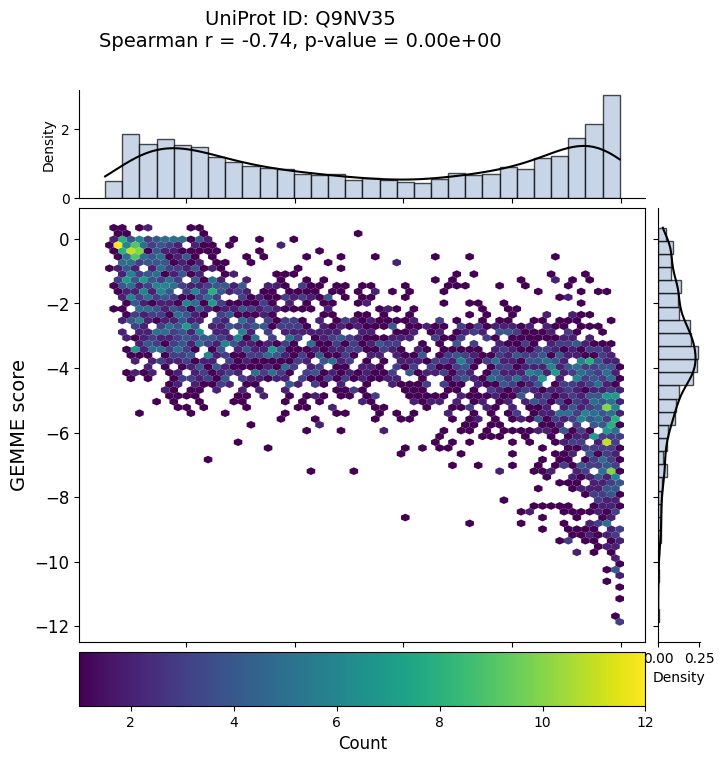

In [10]:
# Correlate DMS scores with AlphaMissense predictions
from proteingympy.model_corr_plot import model_corr_plot

corr_plot = model_corr_plot(uniprot_id="Q9NV35")


By default, the `model_corr_plot()` function gathers any of the 217 DMS assays of the chosen UniProt ID and correlates the average DMS score across relevant assays and the AlphaMissense model predictions.

Although the default uses the AlphaMissense scores, it is simple to correlate DMS experimental scores with predictions from any of the 79 zero-shot or supervised models.

## Correlate prediction scores between two models

Similar to the above, we can also explore the correlation between two different models for a given protein instead of looking at the DMS experimental data. We can do this for the protein "P04637" and the `model_corr_plot()` function. By default, the function only requires a UniProt ID, and uses "AlphaMissense" and "EVE_single" models as defaults. Let's change that to "Kermut" and "ProteinNPT" for our demonstration.

Loading data for Kermut...
Querying UniProt API for 185 entries...
Querying UniProt API for 185 entries...
Summary metrics file not found at .cache/merged_scores_substitutions_DMS.csv
Summary metrics file not found at .cache/merged_scores_substitutions_DMS.csv
Loading data for ProteinNPT...
Loading data for ProteinNPT...
Querying UniProt API for 185 entries...
Querying UniProt API for 185 entries...
Summary metrics file not found at .cache/merged_scores_substitutions_DMS.csv
Summary metrics file not found at .cache/merged_scores_substitutions_DMS.csv
Merging model predictions...
Found 7467 common mutants
Spearman r = 0.954, p-value = 0.00e+00
Merging model predictions...
Found 7467 common mutants
Spearman r = 0.954, p-value = 0.00e+00


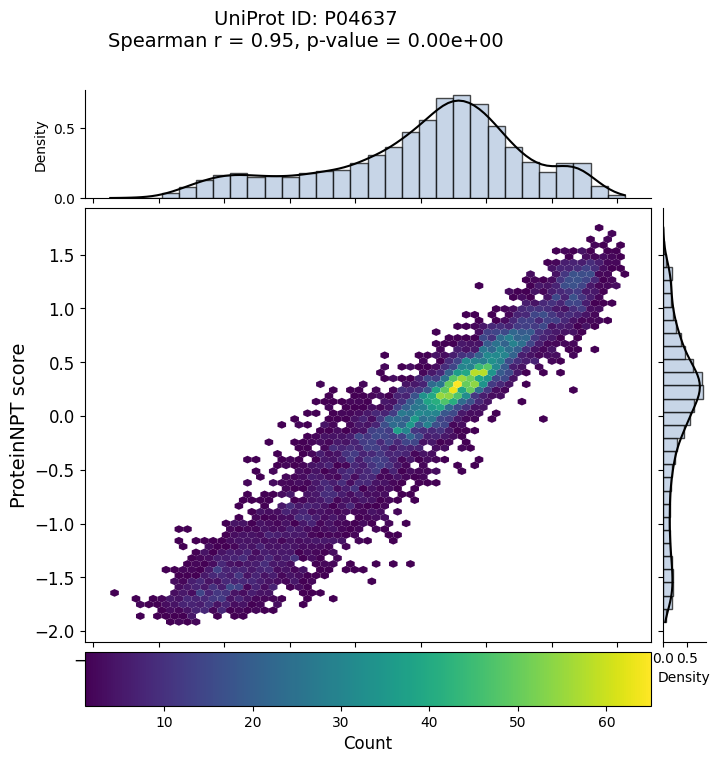

In [11]:
from proteingympy.model_corr_plot import model_corr_plot

# Correlate two models
model_comparison = model_corr_plot(
    uniprot_id="P04637",
    model1="Kermut",
    model2="ProteinNPT"
)

There seems to be good correlation between the model predictions for all variants in assays assessing the "P04637" protein.

## Session Info

In [12]:
# Print Python and package versions
import sys
print(f"Python version: {sys.version}")
print(f"\nPackage versions:")

packages = ['proteingympy', 'pandas', 'numpy', 'matplotlib', 'seaborn']
for package in packages:
    try:
        mod = __import__(package)
        version = getattr(mod, '__version__', 'unknown')
        print(f"{package}: {version}")
    except ImportError:
        print(f"{package}: not installed")

# Optional packages
optional_packages = ['nglview', 'Bio']
for package in optional_packages:
    try:
        mod = __import__(package)
        version = getattr(mod, '__version__', 'unknown')
        print(f"{package}: {version}")
    except ImportError:
        print(f"{package}: not installed (optional)")

Python version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:09:02) [GCC 11.2.0]

Package versions:
proteingympy: unknown
pandas: 2.3.1
numpy: 2.3.2
matplotlib: 3.10.5
seaborn: 0.13.2
nglview: 3.1.4
Bio: 1.86


## References

- Notin, P., et al. (2023). ProteinGym: Large-Scale Benchmarks for Protein Design and Fitness Prediction. *Advances in Neural Information Processing Systems*, 36.
- Chan, K. K., et al. (2020). Engineering human ACE2 to optimize binding to the spike protein of SARS coronavirus 2. *Science*, 369(6508), 1261-1265.
- Lee, J. M., et al. (2018). Deep mutational scanning of hemagglutinin helps predict evolutionary fates of human H3N2 influenza variants. *Proceedings of the National Academy of Sciences*, 115(35), E8276-E8285.